In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Trials.csv')

In [3]:
df.head(2)

,id,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,0,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,1
1,5656162,Simone Economo,eKoeS,68,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,1


In [4]:
df['dataset'].value_counts()

1    1481
2    1337
Name: dataset, dtype: int64

In [5]:
real_df = df[df['dataset']==1][0:200]
fake_df = df[df['dataset']==2][0:200]

# Making new columns from Time 

In [6]:
df['created_at'] = pd.to_datetime(df.created_at)

In [7]:
df['Month'] = df.created_at.dt.month

In [8]:
df['Year'] = df.created_at.dt.year

In [9]:
df['Time'] = df.created_at.dt.time

In [10]:
df.head(2)

,id,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,...,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Month,Year,Time
0,3610511,Davide Dellacasa,braddd,0,20370,5470,2385,145,52,2007-04-06 10:58:22+00:00,...,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,1,4,2007,10:58:22
1,5656162,Simone Economo,eKoeS,68,3131,506,381,9,40,2007-04-30 15:08:42+00:00,...,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,1,4,2007,15:08:42


# Label Encoding

In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
le.fit(df['screen_name'])

LabelEncoder()

In [14]:
df['screen_name'] = le.transform(df['screen_name'])

In [15]:
le.fit(df['name'])

LabelEncoder()

In [16]:
df['name'] = le.transform(df['name'])

In [17]:
le.fit(df['Time'])

LabelEncoder()

In [18]:
df['Time'] = le.transform(df['Time'])

In [19]:
df.columns

Index(['id', 'name', 'screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'Month', 'Year', 'Time'],
      dtype='object')

In [20]:
col_to_drop = ['id','created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated']

In [21]:
df = df.drop(col_to_drop,axis=1)

In [22]:
df.columns

Index(['name', 'screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'dataset', 'Month', 'Year', 'Time'],
      dtype='object')

# Feature Engineering

In [24]:
X = df[['name', 'screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'Year', 'Month', 'Time']]

In [25]:
y = df['dataset']

In [26]:
X[0:6]

,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,Year,Month,Time
0,573,1106,0,20370,5470,2385,145,52,2007,4,763
1,2251,1409,68,3131,506,381,9,40,2007,4,1282
2,2767,2626,7696,4024,264,87,323,16,2007,5,872
3,2527,942,202,40586,640,622,1118,32,2007,5,1880
4,157,680,37318,2016,62,64,13,0,2007,5,2257
5,327,1291,3901,3603,138,179,53,1,2007,5,1299


# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 4)

In [29]:
X_train.shape

(2254, 11)

In [30]:
y_train.shape

(2254,)

In [31]:
X_test.shape

(564, 11)

In [32]:
y_test.shape

(564,)

# Decision Tree Classifier 

In [33]:
from sklearn import tree

In [34]:
clf = tree.DecisionTreeClassifier(max_depth= 5)

In [35]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
clf.score(X_test, y_test)

0.9893617021276596

In [37]:
y_predict = clf.predict(X_test)

# Getting the Classification Report and Confusion Matrix

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
print(classification_report(y_predict,y_test.values))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       296
           2       0.99      0.99      0.99       268

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



In [40]:
print('Accuracy Score:' ,accuracy_score(y_predict,y_test.values))

Accuracy Score: 0.9893617021276596


In [41]:
print(confusion_matrix(y_test, y_test))

[[298   0]
 [  0 266]]


# GradientBoostingClassifier

In [42]:
from sklearn.datasets import make_classification

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
clfgb = GradientBoostingClassifier(random_state=0)

In [45]:
clfgb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
clfgb.predict(X_test[:2])

array([2, 1], dtype=int64)

In [47]:
clfgb.score(X_test, y_test)

0.9964539007092199

# Visualizing Decision Trees

In [48]:
from sklearn.externals.six import StringIO 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [49]:
from IPython.display import Image

In [50]:
from sklearn.tree import export_graphviz

In [51]:
import pydotplus

In [52]:
dot_data = StringIO()

In [62]:
#export_graphviz(clf, out_file=dot_data,  
                ##filled=True, rounded=True,
               # special_characters=True,feature_names = features_df,class_names=['1','2'])

In [64]:
#tree.export_graphviz(clf,
#                     out_file="tree.dot",
#                    feature_names = X, 
#                     class_names=['1','2'],
#                    filled = True)

# MEthod 2

In [56]:
from sklearn import tree

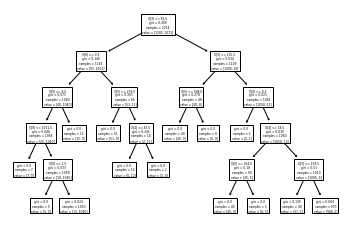

In [57]:
tree.plot_tree(clf);

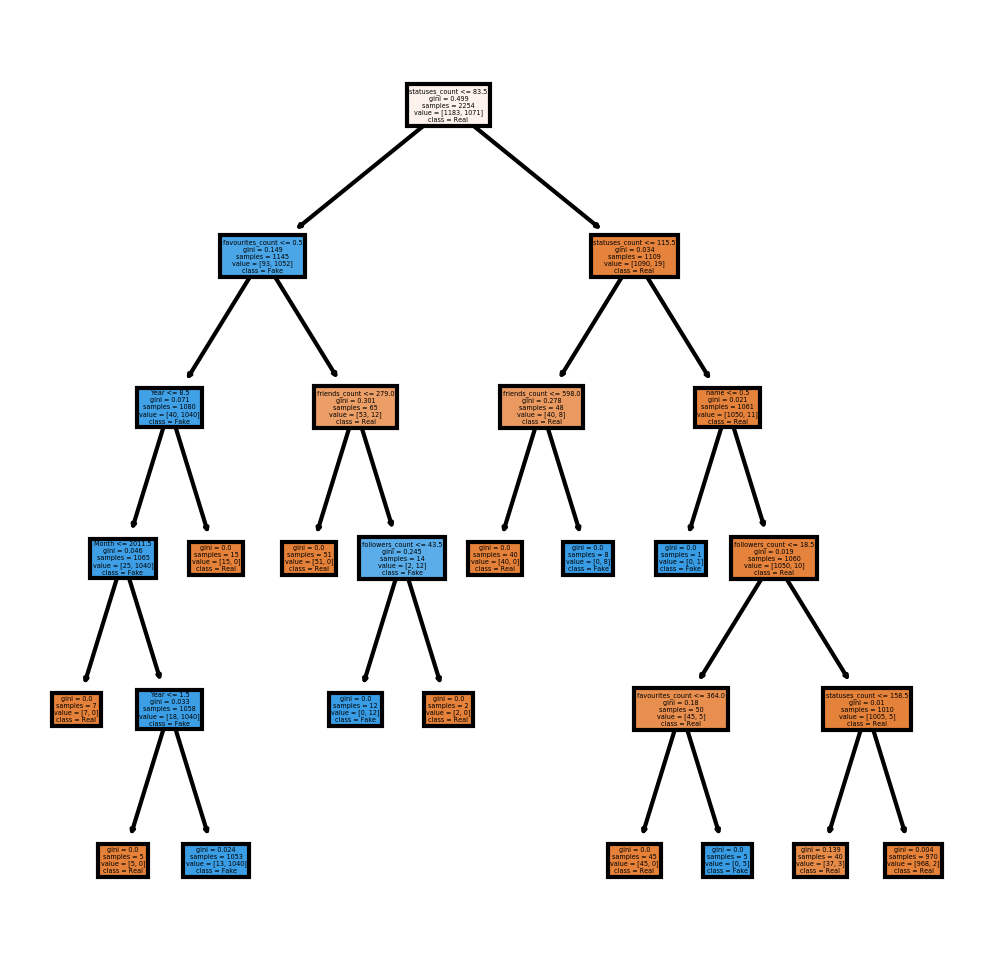

In [58]:
features_df =['name', 'screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'Month', 'Year', 'Time']
cn=['Real','Fake']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = features_df, 
               class_names=cn,
               filled = True);
fig.savefig('DecisionTree.png')